Чеботарева и Шарапов

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,Тип,Подтверждено риэлтором,Количество розеток,Долгота,Количество зеркал,Цвет стен,Ремонтируется,Перепродажа,Готово к сдаче,Кол-во комнат,Площадь (фут²),Адрес,Широта,Опубликовано,Цена
0,0,BHK,0,7,12.969910,0,Зеленый,0,1,1,3,1510.269835,"Amruthnagar,Bangalore",77.597960,Owner,75.0
1,1,BHK,0,1,21.158795,0,Золотистый,0,1,1,3,1365.103003,"Shankar Nagar,Amravati",77.317542,Owner,55.0
2,2,BHK,0,1,30.689021,0,Черный,0,1,1,2,1200.000000,"Mdc Sector-4,Panchkula",76.860403,Dealer,79.5
3,3,BHK,0,6,28.385415,0,Серый,0,1,1,3,1785.469029,"Sector-82A Gurgaon,Gurgaon",76.964613,Dealer,130.0
4,4,BHK,0,4,18.972317,2,Фиолетовый,0,1,1,3,2500.000000,"Breach Candy,Lalitpur",72.806327,Dealer,2550.0


In [5]:
df.isna().sum()

id                        0
Тип                       0
Подтверждено риэлтором    0
Количество розеток        0
Долгота                   0
Количество зеркал         0
Цвет стен                 0
Ремонтируется             0
Перепродажа               0
Готово к сдаче            0
Кол-во комнат             0
Площадь (фут²)            0
Адрес                     0
Широта                    0
Опубликовано              0
Цена                      0
dtype: int64

In [6]:
for col in df.columns:
  print(col, df[col].nunique())

id 22000
Тип 2
Подтверждено риэлтором 2
Количество розеток 8
Долгота 3596
Количество зеркал 4
Цвет стен 15
Ремонтируется 2
Перепродажа 2
Готово к сдаче 2
Кол-во комнат 15
Площадь (фут²) 15358
Адрес 5885
Широта 3583
Опубликовано 3
Цена 1100


In [7]:
df = df.drop(['Адрес','id'], axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()

columns_to_encode = ['Тип', 'Опубликовано', 'Цвет стен',"Адрес"]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


KeyError: ignored

In [ ]:
df.head()

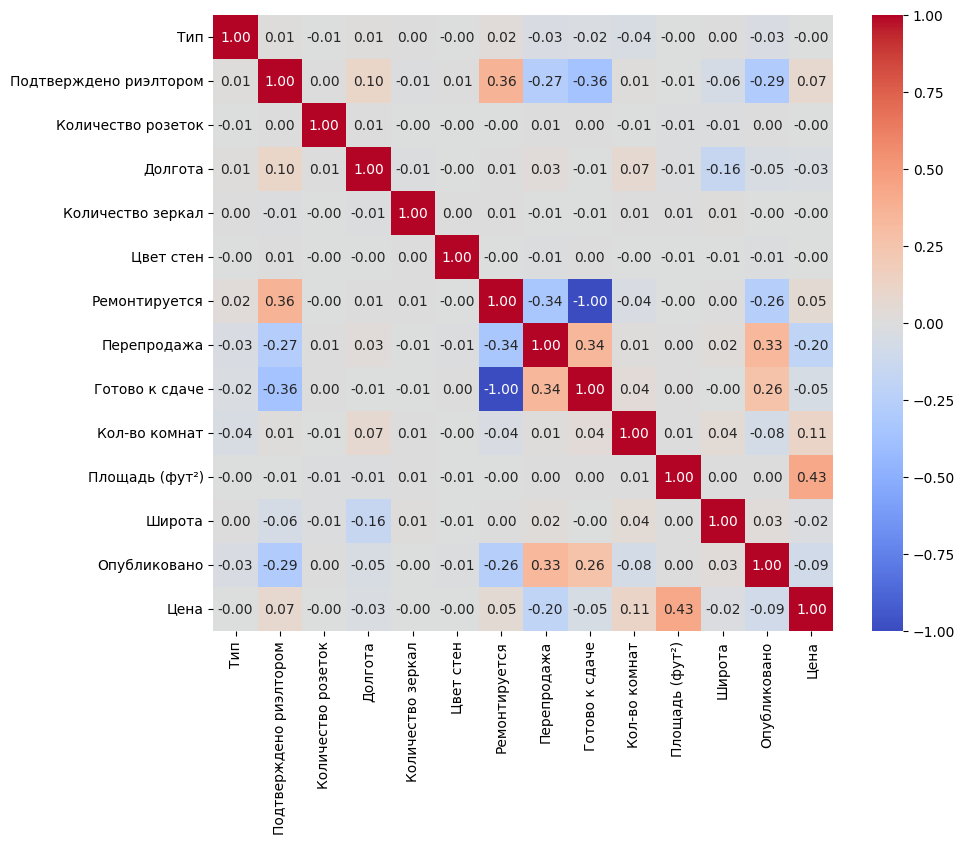

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [11]:
df

,Тип,Подтверждено риэлтором,Количество розеток,Долгота,Количество зеркал,Цвет стен,Ремонтируется,Перепродажа,Готово к сдаче,Кол-во комнат,Площадь (фут²),Широта,Опубликовано,Цена
0,0,0,7,12.969910,0,4,0,1,1,3,1510.269835,77.597960,2,75.0
1,0,0,1,21.158795,0,5,0,1,1,3,1365.103003,77.317542,2,55.0
2,0,0,1,30.689021,0,14,0,1,1,2,1200.000000,76.860403,1,79.5
3,0,0,6,28.385415,0,11,0,1,1,3,1785.469029,76.964613,1,130.0
4,0,0,4,18.972317,2,13,0,1,1,3,2500.000000,72.806327,1,2550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,0,0,6,22.129470,1,0,0,1,1,1,1100.535396,73.417560,2,18.5
21996,0,0,2,10.554221,1,7,0,1,1,3,1802.801276,76.175962,1,130.0
21997,0,1,1,18.618200,0,3,1,1,0,2,725.000000,73.744700,1,58.0
21998,0,1,3,12.870600,3,8,0,1,1,2,1226.907347,77.627900,2,87.0


In [12]:
count_zero = len(df) - df['Ремонтируется'].sum()
count_zero

18030

In [13]:
count_ones = df['Готово к сдаче'].sum()
count_ones

18030

In [14]:
count_ones = df['Тип'].sum()
count_ones

15

# Модель 1

In [37]:
y_train = df['Цена']
X_train = df[["Подтверждено риэлтором", "Перепродажа", "Кол-во комнат", "Площадь (фут²)", "Опубликовано", "Широта", "Долгота","Готово к сдаче"]]


In [38]:
test_df = pd.read_csv('test.csv')

In [39]:
label_encoder = LabelEncoder()
test_df['Опубликовано'] = label_encoder.fit_transform(test_df['Опубликовано'])

In [40]:
X_test = test_df[["Подтверждено риэлтором", "Перепродажа", "Кол-во комнат", "Площадь (фут²)", "Опубликовано", "Широта", "Долгота","Готово к сдаче"]]

In [41]:
X_test.head()

,Подтверждено риэлтором,Ремонтируется,Перепродажа,Кол-во комнат,Площадь (фут²),Опубликовано,Широта,Долгота,Готово к сдаче
0,0,0,1,2,890.279114,2,88.420000,22.580000,1
1,1,0,1,2,1057.501652,1,83.755013,22.803593,1
2,0,0,1,2,1350.093110,1,73.128222,22.288976,1
3,1,0,1,2,1000.000000,1,75.775927,26.900926,1
4,1,1,1,3,1634.229684,1,77.627900,12.870600,0


In [42]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
# y = df['Цена']
# X = df[["Подтверждено риэлтором", "Ремонтируется", "Перепродажа", "Кол-во комнат", "Площадь (фут²)", "Опубликовано", "Широта", "Долгота","Готово к сдаче"]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train.values).view(-1, 1)
X_test = torch.Tensor(X_test)
# y_test = torch.Tensor(y_test.values).view(-1, 1)

In [43]:
class ImprovedRegressionModel(nn.Module):
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_hidden3, n_out, p=0.5):
        super(ImprovedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(in_features=n_inputs, out_features=n_hidden1)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.fc2 = nn.Linear(in_features=n_hidden1, out_features=n_hidden2)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(n_hidden2)
        self.fc3 = nn.Linear(in_features=n_hidden2, out_features=n_hidden3)
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm1d(n_hidden3)
        self.fc4 = nn.Linear(in_features=n_hidden3, out_features=n_out)
        self.dropout = nn.Dropout(p=p)

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu1(out)
        out = self.bn1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.bn2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.bn3(out)
        out = self.fc4(out)
        out = self.dropout(out)
        return out

# Определение модели
n_inputs = X_train.shape[1]
n_hidden1 = 128
n_hidden2 = 64
n_hidden3 = 32
n_out = 1
p = 0.5  # Увеличьте вероятность отключения (dropout) для регуляризации
model = ImprovedRegressionModel(n_inputs, n_hidden1, n_hidden2, n_hidden3, n_out, p)

n_epochs = 300
gamma = 0.1

criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=gamma)

for epoch in range(n_epochs):
    out = model(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 30 == 0 or epoch == n_epochs - 1:
        print(f"{epoch=} {loss.item()=}")


epoch=0 loss.item()=140.65017700195312
epoch=30 loss.item()=119.72090911865234
epoch=60 loss.item()=113.19037628173828
epoch=90 loss.item()=113.99479675292969
epoch=120 loss.item()=113.10698699951172
epoch=150 loss.item()=112.2746810913086
epoch=180 loss.item()=111.62128448486328
epoch=210 loss.item()=111.6243667602539
epoch=240 loss.item()=111.43092346191406
epoch=270 loss.item()=110.88420104980469
epoch=299 loss.item()=111.98030853271484


In [44]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    # test_loss = criterion(y_pred, y_test)
    # print(f'Test Loss: {test_loss.item()}')

In [ ]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# mean_absolute_percentage_error(y_test, y_pred)

51.70964598655701

In [45]:
df_res = pd.DataFrame({'id': range(len(y_pred)), 'Цена': y_pred.view(-1).numpy()})


In [46]:
df_res.head()

,id,Цена
0,0,14.519921
1,1,24.130878
2,2,24.770672
3,3,17.030247
4,4,57.378914


In [47]:
df_res.to_csv('solution3.csv', index = False)

# Модель 2

In [15]:
y_train = df['Цена']
X_train = df[["Подтверждено риэлтором", "Перепродажа", "Кол-во комнат", "Площадь (фут²)", "Опубликовано", "Широта", "Долгота","Готово к сдаче"]]


In [16]:
test_df = pd.read_csv('test.csv')

In [17]:
label_encoder = LabelEncoder()
test_df['Опубликовано'] = label_encoder.fit_transform(test_df['Опубликовано'])

In [18]:
X_test = test_df[["Подтверждено риэлтором", "Перепродажа", "Кол-во комнат", "Площадь (фут²)", "Опубликовано", "Широта", "Долгота","Готово к сдаче"]]

In [19]:
X_test.head()

,Подтверждено риэлтором,Перепродажа,Кол-во комнат,Площадь (фут²),Опубликовано,Широта,Долгота,Готово к сдаче
0,0,1,2,890.279114,2,88.420000,22.580000,1
1,1,1,2,1057.501652,1,83.755013,22.803593,1
2,0,1,2,1350.093110,1,73.128222,22.288976,1
3,1,1,2,1000.000000,1,75.775927,26.900926,1
4,1,1,3,1634.229684,1,77.627900,12.870600,0


In [20]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
# y = df['Цена']
# X = df[["Подтверждено риэлтором", "Ремонтируется", "Перепродажа", "Кол-во комнат", "Площадь (фут²)", "Опубликовано", "Широта", "Долгота","Готово к сдаче","Адрес"]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train.values).view(-1, 1)
X_test = torch.Tensor(X_test)
# y_test = torch.Tensor(y_test.values).view(-1, 1)

In [21]:
import torch.nn.init as init

In [22]:
torch.manual_seed(0)

class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out


input_size = X_train.shape[1]
model = RegressionModel(input_size)
criterion = nn.L1Loss()
learning_rate = 0.1
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 1000

for epoch in range(n_epochs):
    out = model(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


    if (epoch + 1) % 50 == 0:
        print(f'Эпоха [{epoch + 1}/{n_epochs}], Loss: {loss.item()}')


model.eval()
with torch.no_grad():
    y_pred = model(X_test)


# test_loss = criterion(y_pred, y_test)
# print(f'Значение функции потерь на тестовых данных: {test_loss.item()}')


Эпоха [50/1000], Loss: 96.75272369384766
Эпоха [100/1000], Loss: 92.67649841308594
Эпоха [150/1000], Loss: 89.23381042480469
Эпоха [200/1000], Loss: 87.55745697021484
Эпоха [250/1000], Loss: 85.68514251708984
Эпоха [300/1000], Loss: 84.8956527709961
Эпоха [350/1000], Loss: 84.92622375488281
Эпоха [400/1000], Loss: 83.6908950805664
Эпоха [450/1000], Loss: 82.79594421386719
Эпоха [500/1000], Loss: 83.21622467041016
Эпоха [550/1000], Loss: 83.17240142822266
Эпоха [600/1000], Loss: 82.56456756591797
Эпоха [650/1000], Loss: 81.87543487548828
Эпоха [700/1000], Loss: 81.28246307373047
Эпоха [750/1000], Loss: 82.20237731933594
Эпоха [800/1000], Loss: 81.97563934326172
Эпоха [850/1000], Loss: 81.73189544677734
Эпоха [900/1000], Loss: 81.90922546386719
Эпоха [950/1000], Loss: 80.3124771118164
Эпоха [1000/1000], Loss: 80.1397705078125


In [201]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# mean_absolute_percentage_error(y_test, y_pred)

37.74849772453308

In [23]:
y_pred

tensor([[30.5456],
        [45.1847],
        [38.4335],
        ...,
        [69.2367],
        [37.7640],
        [36.4162]])

In [24]:
df_res = pd.DataFrame({'id': range(len(y_pred)), 'Цена': y_pred.view(-1).numpy()})


In [25]:
df_res.head()

,id,Цена
0,0,30.545622
1,1,45.184727
2,2,38.433517
3,3,37.089954
4,4,108.291084


In [26]:
df_res.to_csv('solution11.csv', index = False)